In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [ ]:
def f(X):
  return 3*X[0]**2+12*X[0]+8*X[1]**2+8*X[1]+6*X[0]*X[1]

In [ ]:
x1=np.linspace(-15,15,100)
x2=np.linspace(-15,15,100)

X1,X2=np.meshgrid(x1,x2)
Z=3*X1**2+12*X1+8*X2**2+8*X2+6*X1*X2

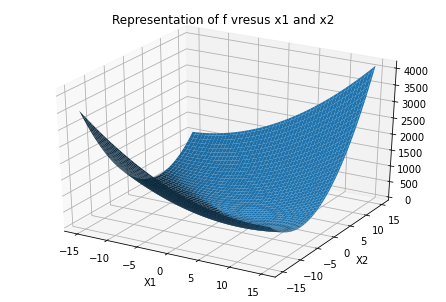

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X1, X2, Z)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Representation of f vresus x1 and x2")
plt.show()

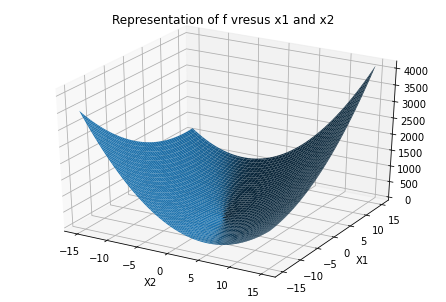

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X2, X1, Z)
plt.xlabel('X2')
plt.ylabel('X1')
plt.title("Representation of f vresus x1 and x2")
plt.show()

In [ ]:
import sympy as sym
x_sym = sym.Symbol('x')
y_sym = sym.Symbol('y')
alfa = sym.Symbol('a')

In [ ]:
def f_sym(x1,x2):
  return 3*x1**2+12*x1+8*x2**2+8*x2+6*x1*x2

In [ ]:
def rond_f_x(a,b):
  return float(sym.diff(f_sym(x_sym,y_sym),x_sym).subs({x_sym: a, y_sym:b}))


In [ ]:
def rond_f_y(a,b):
  return float(sym.diff(f_sym(x_sym,y_sym),y_sym).subs({x_sym: a, y_sym:b}))


In [ ]:
def aggregate(X):
  return np.array([rond_f_x(X[0],X[1]),rond_f_y(X[0],X[1])])

In [ ]:
def phi(x_sym,y_sym,alfa):
  return f_sym(x_sym-alfa*sym.diff(f_sym(x_sym,y_sym),x_sym),y_sym-alfa*sym.diff(f_sym(x_sym,y_sym),y_sym))

In [ ]:
phi(x_sym,y_sym,alfa)

-12*a*(6*x + 6*y + 12) - 8*a*(6*x + 16*y + 8) + 12*x + 8*y + (-6*a*(6*x + 6*y + 12) + 6*x)*(-a*(6*x + 16*y + 8) + y) + 3*(-a*(6*x + 6*y + 12) + x)**2 + 8*(-a*(6*x + 16*y + 8) + y)**2

In [ ]:
sym.diff(phi(x_sym,y_sym,alfa),alfa)

-120*x - 200*y + (-6*a*(6*x + 6*y + 12) + 6*x)*(-6*x - 16*y - 8) + 3*(-a*(6*x + 6*y + 12) + x)*(-12*x - 12*y - 24) + (-a*(6*x + 16*y + 8) + y)*(-36*x - 36*y - 72) + 8*(-a*(6*x + 16*y + 8) + y)*(-12*x - 32*y - 16) - 208

In [ ]:
f_prim=sym.simplify(sym.diff(phi(x_sym,y_sym,alfa),alfa))
f_prim

1224*a*x**2 + 5088*a*x*y + 3840*a*x + 5464*a*y**2 + 7840*a*y + 3040*a - 72*x**2 - 264*x*y - 240*x - 292*y**2 - 400*y - 208

In [ ]:
from sympy import nsolve,solve

In [ ]:
eq1=f_prim.subs({x_sym: 1, y_sym:1})
eq1

26496*a - 1476

In [ ]:
float(nsolve((eq1), (alfa),[0.5]))

0.05570652173913043

In [ ]:
from numpy import linalg as LA
def grad_descent_with_Analytical( gradf, init, max_iter):
    thresh = 1e-5
    prev_t = init-10*thresh
    t = init.copy()
    t = t.astype('float32')
    count = 0
    print("Starting point at {}".format(init))
    while LA.norm(t-prev_t) > thresh and count < max_iter:
      eq1=f_prim.subs({x_sym: t[0], y_sym:t[1]})
      a=float(nsolve((eq1), (alfa),[0.5]))
      prev_t = t.copy()
      t -= a*gradf(t)
      count += 1
      print("Optimum learning rate in epoch {} is {} at the point {}".format(count,a,t))

    print("Ending point after {} epochs is {}".format(count,t))
    return init,t

In [ ]:
IN_2,Res_2=grad_descent_with_Analytical(aggregate, np.array([1,1]),9)

Starting point at [1 1]
Optimum learning rate in epoch 1 is 0.05570652173913043 at the point [-0.33695653 -0.6711956 ]
Optimum learning rate in epoch 2 is 0.24698787128455893 at the point [-1.8068029  0.5046813]
Optimum learning rate in epoch 3 is 0.055706493771754136 at the point [-2.040061    0.21310887]
Optimum learning rate in epoch 4 is 0.24698459069089296 at the point [-2.2965019   0.41826022]
Optimum learning rate in epoch 5 is 0.05570694061838036 at the point [-2.3371985  0.3673913]
Optimum learning rate in epoch 6 is 0.24719887955182074 at the point [-2.3819802   0.40321803]
Optimum learning rate in epoch 7 is 0.05566756272401434 at the point [-2.3890736  0.3943331]
Optimum learning rate in epoch 8 is 0.25612745098039214 at the point [-2.397156    0.40076512]
Optimum learning rate in epoch 9 is 0.05464824120603015 at the point [-2.3983393   0.39916363]
Ending point after 9 epochs is [-2.3983393   0.39916363]


In [ ]:
print(f(IN_2))
print(f(Res_2))

37
-12.799994463737782


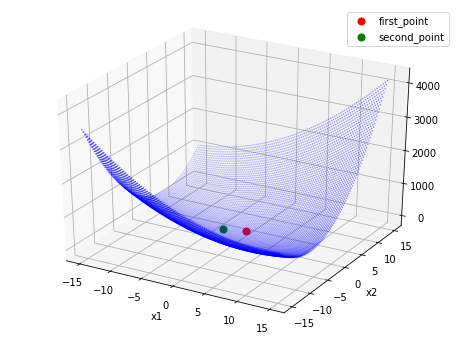

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter3D(X1, X2, f(np.array([X1,X2])), color='blue',s=0.1);

ax.scatter3D(IN_2[0],IN_2[1], f(IN_2), color='red',s=50,label='first_point');

ax.scatter3D(Res_2[0] ,Res_2[1] ,f(Res_2), color='green',s=50,label='second_point')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2');

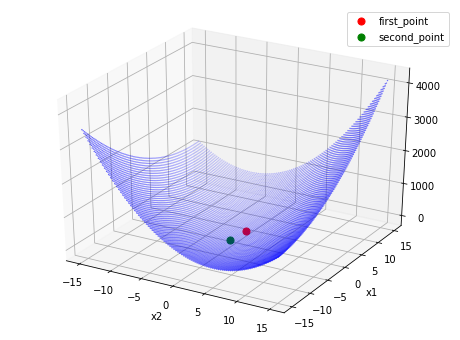

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter3D(X2, X1, f(np.array([X1,X2])), color='blue',s=0.1);

ax.scatter3D(IN_2[1],IN_2[0], f(IN_2), color='red',s=50,label='first_point');

ax.scatter3D(Res_2[1] ,Res_2[0] ,f(Res_2), color='green',s=50,label='second_point')
ax.legend()
ax.set_xlabel('x2')
ax.set_ylabel('x1');